In [1]:
# Web Scraping Name Analysis project. Common first and last names in the US.
# Website scraped: https://names.mongabay.com/most_common_surnames.htm

In [2]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## 1) Scrape website and create base data frames for last names, male first names, and female first names.

In [4]:
# 1a) Scrape website and create data frame for last names.

# Create list of multiple webpages of last names.
surname_web_pages = ['', 1, 2, 5, 8, 12, 16]

# Set up last name data frame.
surname_column_headers = ['Surname', 'Approximate Number', '% Frequency', 'Rank']
ln_df = pd.DataFrame(columns = surname_column_headers)

# Scrape multiple web pages and store data in last name data frame.
for i in surname_web_pages:
    url = f'https://names.mongabay.com/most_common_surnames{i}.htm'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    row_data = soup.find_all('tr')[1:]
    for row in row_data:
        table_data = row.find_all('td')
        individual_row_data = [data.text.strip() for data in table_data]
        length = len(ln_df)
        ln_df.loc[length] = individual_row_data

ln_df

,Surname,Approximate Number,% Frequency,Rank
0,SMITH,"2,501,922",1.006,1
1,JOHNSON,"2,014,470",0.81,2
2,WILLIAMS,"1,738,413",0.699,3
3,JONES,"1,544,427",0.621,4
4,BROWN,"1,544,427",0.621,5
...,...,...,...,...
18835,AMEND,"2,487",0.001,18835
18836,ALPHIN,"2,487",0.001,18836
18837,ALLBRIGHT,"2,487",0.001,18837
18838,AIKIN,"2,487",0.001,18838


In [5]:
# 1b) Scrape website and create data frames for male and female first names.

# Fetch html from website for male and female common first names.
url_males = 'https://names.mongabay.com/male_names_alpha.htm'
page_males = requests.get(url_males)
soup_males = BeautifulSoup(page_males.text, 'html.parser')

url_females = 'https://names.mongabay.com/female_names_alpha.htm'
page_females = requests.get(url_females)
soup_females = BeautifulSoup(page_females.text, 'html.parser')

# Set up data frames for male and female first names.
fn_column_headers = ['Name', '% Frequency', 'Approximate Number', 'Rank']
mfn_df = pd.DataFrame(columns = fn_column_headers)
ffn_df = pd.DataFrame(columns = fn_column_headers)

# Scrape website for male first name data.
m_row_data = soup_males.find_all('tr')[1:]
for row in m_row_data:
    table_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in table_data]
    length = len(mfn_df)
    mfn_df.loc[length] = individual_row_data

# Scrape website for female first name data.
f_row_data = soup_females.find_all('tr')[1:]
for row in f_row_data:
    table_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in table_data]
    length = len(ffn_df)
    ffn_df.loc[length] = individual_row_data

In [9]:
# Display male first name data frame.
mfn_df

,Name,% Frequency,Approximate Number,Rank
0,AARON,0.24,"350,151",77
1,ABDUL,0.007,"10,213",831
2,ABE,0.006,"8,754",854
3,ABEL,0.019,"27,720",485
4,ABRAHAM,0.035,"51,064",347
...,...,...,...,...
1214,ZACHARY,0.099,"144,437",181
1215,ZACHERY,0.008,"11,672",761
1216,ZACK,0.004,"5,836",1135
1217,ZACKARY,0.004,"5,836",1149


In [10]:
# Display female first name data frame.
ffn_df

,Name,% Frequency,Approximate Number,Rank
0,AARON,0.002,"3,036",2701
1,ABBEY,0.004,"6,072",1583
2,ABBIE,0.008,"12,145",1041
3,ABBY,0.016,"24,289",694
4,ABIGAIL,0.025,"37,952",520
...,...,...,...,...
4270,ZORA,0.003,"4,554",1714
4271,ZORAIDA,0.004,"6,072",1510
4272,ZULA,0.003,"4,554",1853
4273,ZULEMA,0.002,"3,036",2187


In [12]:
## 2) Clean data in base data frames as needed.

In [13]:
# 2a) Inspect data types of data frames.
ln_df.dtypes

Surname               object
Approximate Number    object
% Frequency           object
Rank                  object
dtype: object

In [15]:
mfn_df.dtypes

Name                  object
% Frequency           object
Approximate Number    object
Rank                  object
dtype: object

In [16]:
ffn_df.dtypes

Name                  object
% Frequency           object
Approximate Number    object
Rank                  object
dtype: object

In [19]:
# 2b) Convert numeric columns to number/float data types.

# Remove comma separator from the Approximate Number columns.
ln_df['Approximate Number'] = ln_df['Approximate Number'].str.replace(',', '', regex = False)
mfn_df['Approximate Number'] = mfn_df['Approximate Number'].str.replace(',', '', regex = False)
ffn_df['Approximate Number'] = ffn_df['Approximate Number'].str.replace(',', '', regex = False)

# Convert % Frequency columns to float.
ln_df['% Frequency'] = ln_df['% Frequency'].astype(float)
mfn_df['% Frequency'] = mfn_df['% Frequency'].astype(float)
ffn_df['% Frequency'] = ffn_df['% Frequency'].astype(float)

# Convert Approximate Number and Rank columns to integer.
ln_df['Approximate Number'] = pd.to_numeric(ln_df['Approximate Number'])
mfn_df['Approximate Number'] = pd.to_numeric(mfn_df['Approximate Number'])
ffn_df['Approximate Number'] = pd.to_numeric(ffn_df['Approximate Number'])

ln_df['Rank'] = pd.to_numeric(ln_df['Rank'])
mfn_df['Rank'] = pd.to_numeric(mfn_df['Rank'])
ffn_df['Rank'] = pd.to_numeric(ffn_df['Rank'])

In [27]:
## 3) Create data frames for visualizations.

In [30]:
# 3a) Create top 10 common name data frames.
top_ln_df = ln_df.sort_values(by = 'Approximate Number', ascending = False).head(10)
top_mfn_df = mfn_df.sort_values(by = 'Approximate Number', ascending = False).head(10)
top_ffn_df = ffn_df.sort_values(by = 'Approximate Number', ascending = False).head(10)

In [38]:
# 3b) Create data frames for each letter in the alphabet. Each df will contain the average use of names beginning with each specific letter.

# Set up initial alphabet list.
alpha = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Data frame for average use of last names starting with each letter.
ln_letter_averages = []
for letter in alpha:
    df = ln_df[ln_df['Surname'].str.startswith(letter)]
    avg = round(df['Approximate Number'].mean())
    ln_letter_averages.append(avg)

data = {'Letter': alpha,
        'Average Use': ln_letter_averages}

ln_avg_df = pd.DataFrame(data)

# Data frame for average use of male first names starting with each letter.
mfn_letter_averages = []
for letter in alpha:
    df = mfn_df[mfn_df['Name'].str.startswith(letter)]
    avg = round(df['Approximate Number'].mean())
    mfn_letter_averages.append(avg)

data = {'Letter': alpha,
        'Average Use': mfn_letter_averages}

mfn_avg_df = pd.DataFrame(data)

# Data frame for average use of female first names starting with each letter.
ffn_letter_averages = []
for letter in alpha:
    df = ffn_df[ffn_df['Name'].str.startswith(letter)]
    avg = round(df['Approximate Number'].mean())
    ffn_letter_averages.append(avg)

data = {'Letter': alpha,
        'Average Use': ffn_letter_averages}

ffn_avg_df = pd.DataFrame(data)

In [41]:
ln_avg_df.head(3)

,Letter,Average Use
0,A,10570
1,B,9831
2,C,10485


In [42]:
mfn_avg_df.head(3)

,Letter,Average Use
0,A,82088
1,B,76955
2,C,100367


In [43]:
ffn_avg_df.head(3)

,Letter,Average Use
0,A,31020
1,B,45395
2,C,29596


In [45]:
# 3c) Create data frame for first names used for both males and females.

# Create lists for male and female lists.
male_names = mfn_df['Name'].tolist()
female_names = ffn_df['Name'].tolist()

# Create list of duplicate names between male and female lists.
duplicates = [item for item in male_names if item in female_names]

# Create lists of use amounts per each duplicate name from the male and female data frames.
dmale_filtered = mfn_df[mfn_df['Name'].isin(duplicates)]
male_use = dmale_filtered['Approximate Number'].tolist()

dfemale_filtered = ffn_df[ffn_df['Name'].isin(duplicates)]
female_use = dfemale_filtered['Approximate Number'].tolist()

# Create data from using duplicate, male_use, and female_use lists created above.
data = {'Name': duplicates,
        'Male Use': male_use,
        'Female Use': female_use}

common_name_df = pd.DataFrame(data)
common_name_df

,Name,Male Use,Female Use
0,AARON,350151,3036
1,ADAM,377871,1518
2,ADRIAN,100668,13663
3,ALBERT,458114,1518
4,ALEX,167781,3036
...,...,...,...
326,WHITNEY,7295,68314
327,WILLIAM,3575914,10627
328,WILLIE,440606,147255
329,YONG,8754,10627


In [46]:
## 4) Plot visualizations for data frames from step 3.

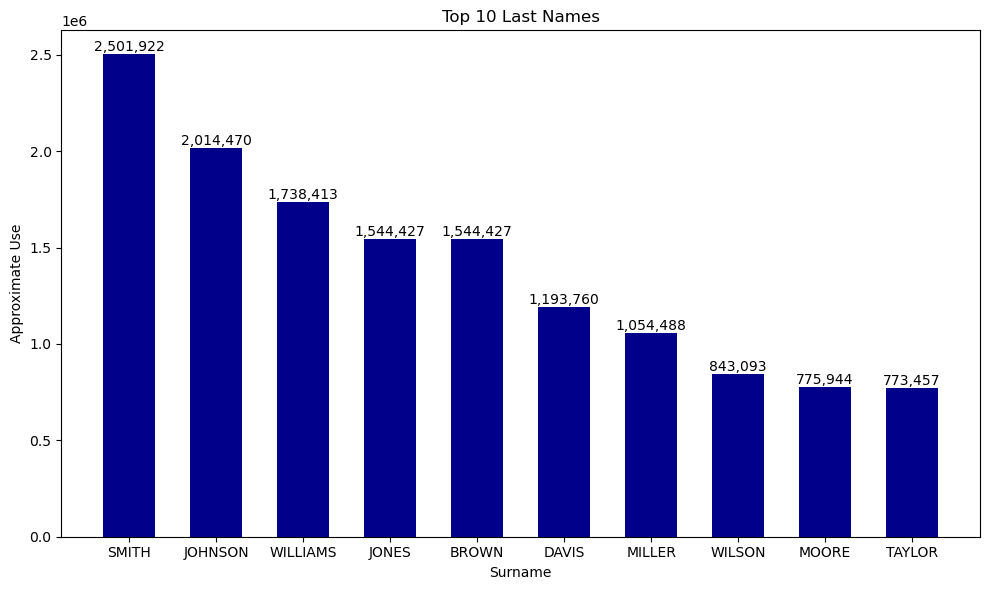

In [51]:
# 4a) Top 10 common last names.
plt.figure(figsize = (10, 6))
bars = plt.bar(top_ln_df['Surname'], top_ln_df['Approximate Number'], color = 'darkblue', width = 0.6)

plt.title('Top 10 Last Names')
plt.xlabel('Surname')
plt.ylabel('Approximate Use')

for bar in bars:
    yval = bar.get_height()
    label = f'{int(yval):,}'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, label, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
plt.show()

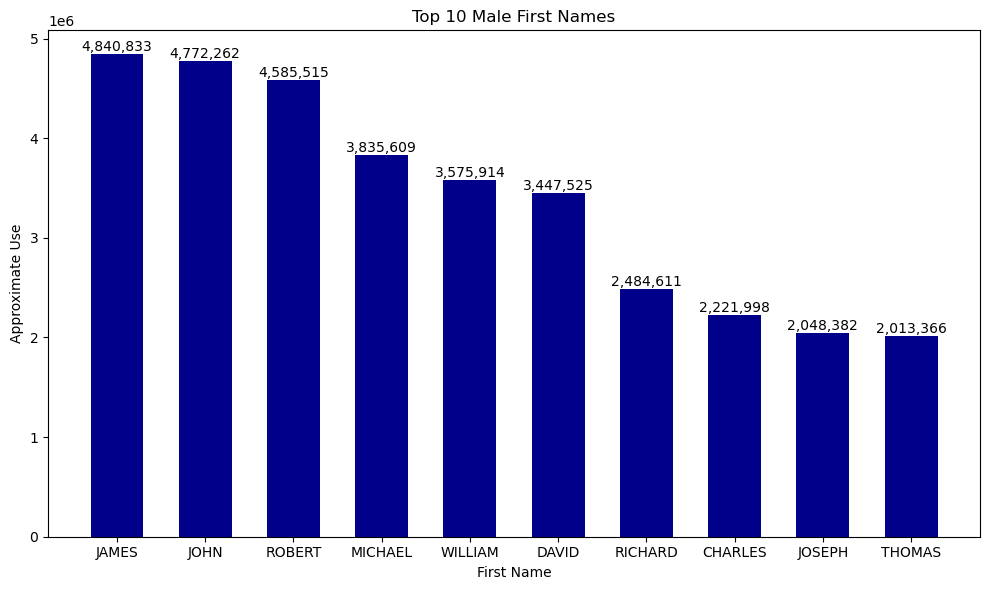

In [57]:
# 4b) Top 10 common male first names.
plt.figure(figsize = (10, 6))
bars = plt.bar(top_mfn_df['Name'], top_mfn_df['Approximate Number'], color = 'darkblue', width = 0.6)

plt.title('Top 10 Male First Names')
plt.xlabel('First Name')
plt.ylabel('Approximate Use')

for bar in bars:
    yval = bar.get_height()
    label = f'{int(yval):,}'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, label, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
plt.show()

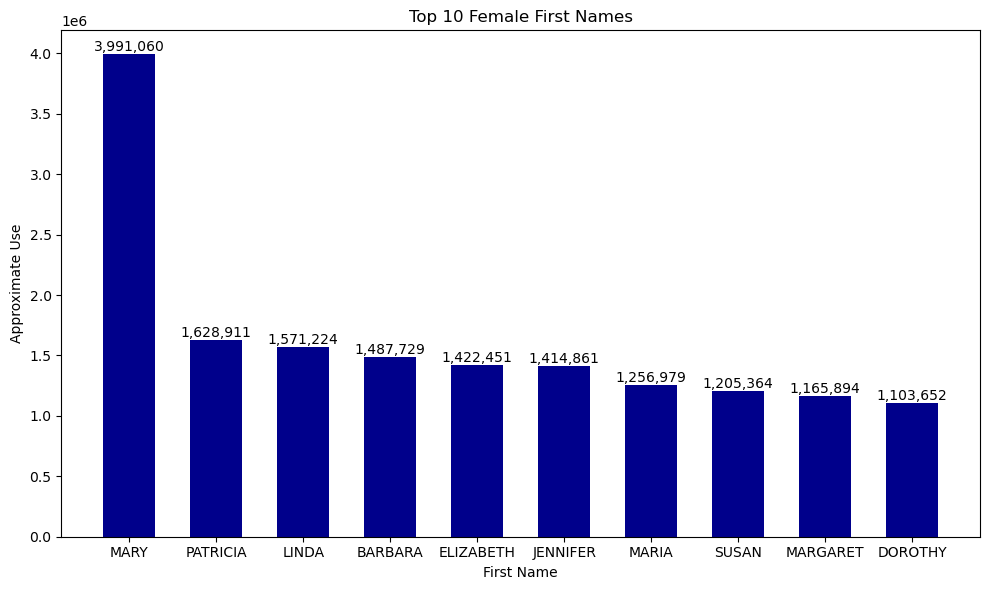

In [58]:
# 4c) Top 10 common female first names.
plt.figure(figsize = (10, 6))
bars = plt.bar(top_ffn_df['Name'], top_ffn_df['Approximate Number'], color = 'darkblue', width = 0.6)

plt.title('Top 10 Female First Names')
plt.xlabel('First Name')
plt.ylabel('Approximate Use')

for bar in bars:
    yval = bar.get_height()
    label = f'{int(yval):,}'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, label, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
plt.show()

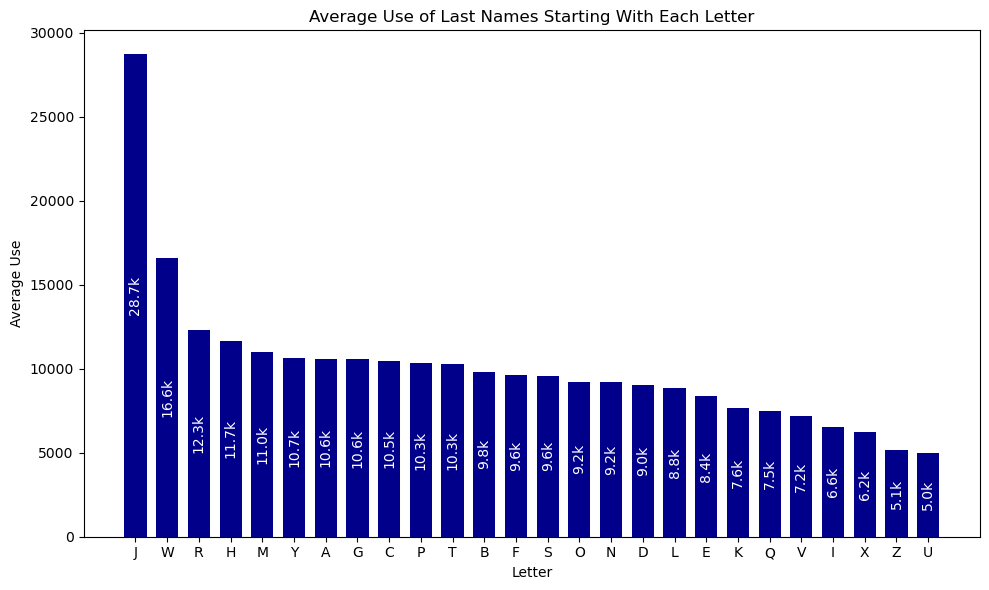

In [65]:
# 4d) Average use of of last names starting with each letter.

# Order data frame in desc order.
ln_avg_df_ordered = ln_avg_df.sort_values(by = 'Average Use', ascending = False)

# Function to create data labels.
def format_abbreviation(x):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}k'
    else:
        return str(int(x))

# Plot graph
plt.figure(figsize = (10, 6))
bars = plt.bar(ln_avg_df_ordered['Letter'], ln_avg_df_ordered['Average Use'], color = 'darkblue', width = .7)

plt.title('Average Use of Last Names Starting With Each Letter')
plt.xlabel('Letter')
plt.ylabel('Average Use')

for bar in bars:
    yval = bar.get_height()
    label = format_abbreviation(yval)   
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, label, ha = 'center', va = 'center', color = 'white', fontsize = 10, rotation = 90)

plt.tight_layout()
plt.show()

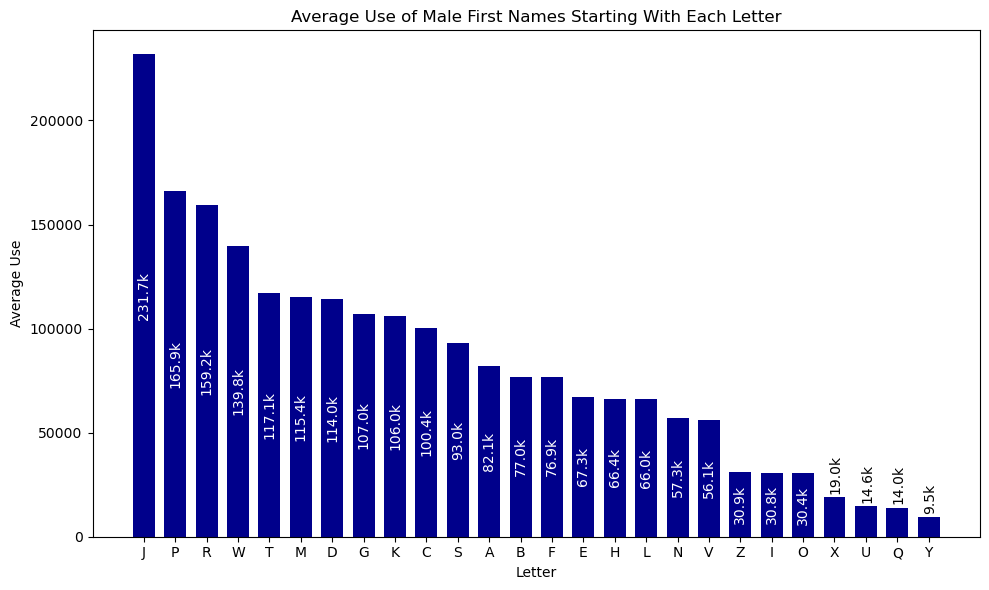

In [83]:
# 4e) Average use of male first names starting with each letter.

# Order data frame in desc order.
mfn_avg_df_ordered = mfn_avg_df.sort_values(by = 'Average Use', ascending = False)

# Function to create data labels.
def format_abbreviation(x):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}k'
    else:
        return str(int(x))

# Plot graph
plt.figure(figsize = (10, 6))
bars = plt.bar(mfn_avg_df_ordered['Letter'], mfn_avg_df_ordered['Average Use'], color = 'darkblue', width = .7)

plt.title('Average Use of Male First Names Starting With Each Letter')
plt.xlabel('Letter')
plt.ylabel('Average Use')

for bar in bars:
    yval = bar.get_height()
    label = format_abbreviation(yval)   
    x_pos = bar.get_x() + bar.get_width() / 2
    if yval / 2 > (0.05 * max(mfn_avg_df_ordered['Average Use'])):
        # Place labels inside bars
        plt.text(x_pos, yval / 2, label, ha='center', va='center', color='white', fontsize=10, rotation=90)
    else:
        # Place labels outside bars if they don't fit
        plt.text(x_pos + 0.05 * bar.get_width(), yval + 1500, label, ha='center', va='bottom', color='black', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()

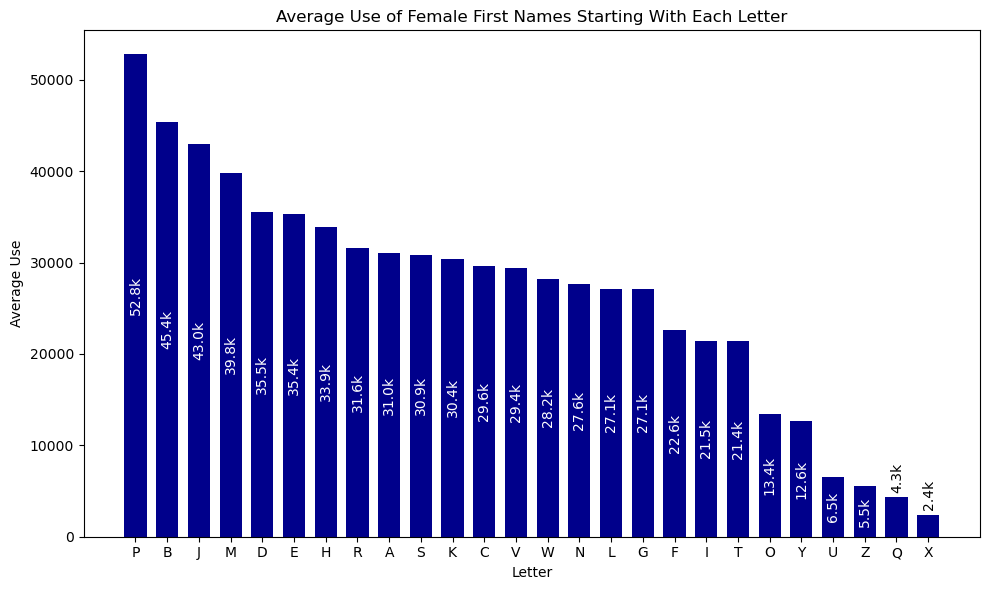

In [84]:
# 4f) Average use of female first names starting with each letter.

# Order data frame in desc order.
ffn_avg_df_ordered = ffn_avg_df.sort_values(by = 'Average Use', ascending = False)

# Function to create data labels.
def format_abbreviation(x):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}k'
    else:
        return str(int(x))

# Plot graph
plt.figure(figsize = (10, 6))
bars = plt.bar(ffn_avg_df_ordered['Letter'], ffn_avg_df_ordered['Average Use'], color = 'darkblue', width = .7)

plt.title('Average Use of Female First Names Starting With Each Letter')
plt.xlabel('Letter')
plt.ylabel('Average Use')

for bar in bars:
    yval = bar.get_height()
    label = format_abbreviation(yval)   
    x_pos = bar.get_x() + bar.get_width() / 2
    if yval / 2 > (0.05 * max(ffn_avg_df_ordered['Average Use'])):
        # Place labels inside bars
        plt.text(x_pos, yval / 2, label, ha='center', va='center', color='white', fontsize=10, rotation=90)
    else:
        # Place labels outside bars if they don't fit
        plt.text(x_pos + 0.05 * bar.get_width(), yval + 500, label, ha='center', va='bottom', color='black', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()

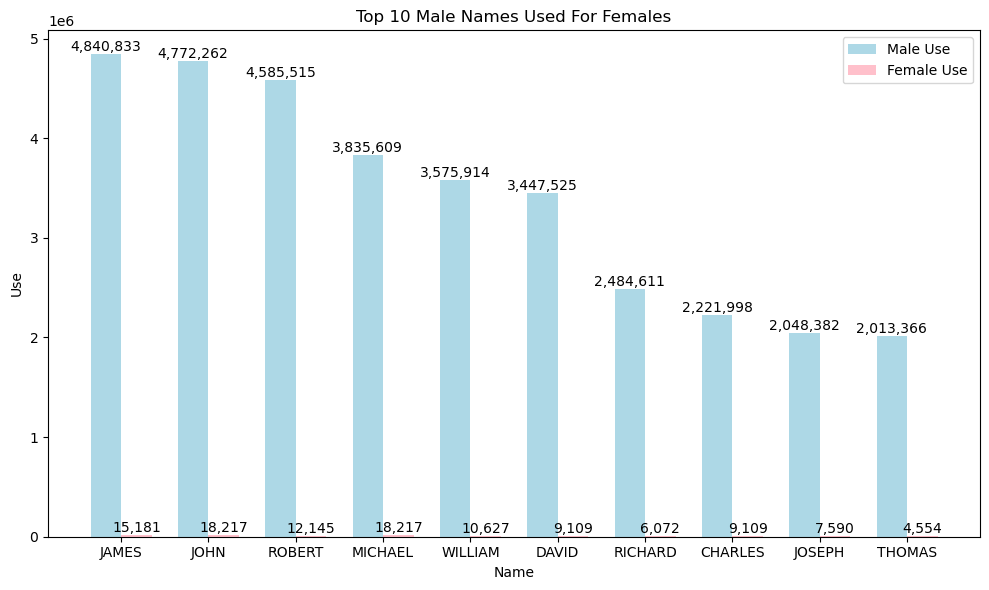

In [100]:
# 4g) Top 10 male names used for females as well.

# Sort common names data frame for top male names.
mdf = common_name_df.sort_values(by='Male Use', ascending=False).head(10)

# Plot graph.
num_names = len(mdf)
x = np.arange(num_names)  
width = 0.35  

plt.figure(figsize=(10, 6))

bars_male = plt.bar(x - width/2, mdf['Male Use'], width, label='Male Use', color='lightblue')
bars_female = plt.bar(x + width/2, mdf['Female Use'], width, label='Female Use', color='pink')

plt.xlabel('Name')
plt.ylabel('Use')
plt.title('Top 10 Male Names Used For Females')
plt.xticks(x, mdf['Name'])

plt.legend()

for bars in [bars_male, bars_female]:
    for bar in bars:
        yval = bar.get_height()
        label = f'{int(yval):,}'
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

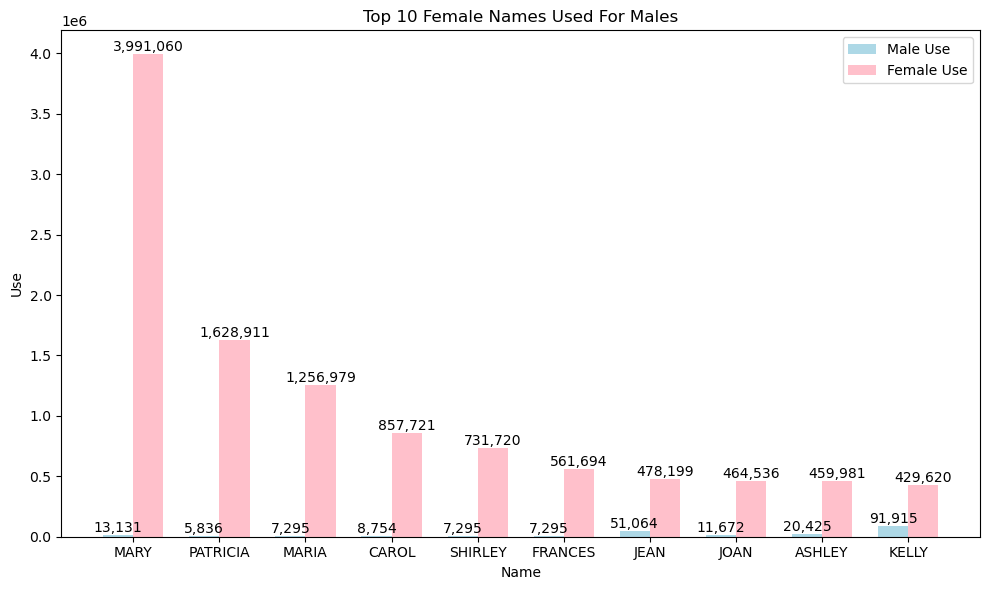

In [103]:
# 4h) Top 10 female names used for males as well.

# Sort common names data frame for top male names.
mdf = common_name_df.sort_values(by='Female Use', ascending=False).head(10)

# Plot graph.
num_names = len(mdf)
x = np.arange(num_names)  
width = 0.35  

plt.figure(figsize=(10, 6))

bars_male = plt.bar(x - width/2, mdf['Male Use'], width, label='Male Use', color='lightblue')
bars_female = plt.bar(x + width/2, mdf['Female Use'], width, label='Female Use', color='pink')

plt.xlabel('Name')
plt.ylabel('Use')
plt.title('Top 10 Female Names Used For Males')
plt.xticks(x, mdf['Name'])

plt.legend()

for bars in [bars_male, bars_female]:
    for bar in bars:
        yval = bar.get_height()
        label = f'{int(yval):,}'
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [114]:
## 5) Summary

# Data Frames created -->
# ln_df
# mfn_df
# ffn_df
# common_name_df

# Export data frames to excel.
file_path = r'C:\Users\mcsan\OneDrive\Desktop\data analytics projects\names.xlsx'

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    ln_df.to_excel(writer, sheet_name='last names', index=False)
    mfn_df.to_excel(writer, sheet_name='male first names', index=False)
    ffn_df.to_excel(writer, sheet_name='female first names', index=False)
    common_name_df.to_excel(writer, sheet_name='matching names', index=False)

In [157]:
# 5a) Random male and female name generator.

# Generate male and female random name.
first_name_male = rd.choice(male_names)
first_name_female = rd.choice(female_names)

last_names = ln_df['Surname'].tolist()
last_name_male = rd.choice(last_names)
last_name_female = rd.choice(last_names)

full_male_name = first_name_male.title() + ' ' + last_name_male.title()
full_female_name = first_name_female.title() + ' ' + last_name_female.title()

print(f'The unselected male name is {full_male_name} and the unselected female name is {full_female_name}.')

#Generate male and female random name after specifying the first later of the first and last name.
male_first_letter = input('Please select a letter for the start of the male first name.\n').upper()
male_ln_letter = input('Please select a letter for the start of the male last name.\n').upper()
female_first_letter = input('Please select a letter for the start of the female first name.\n').upper()
female_ln_letter = input('Please select a letter for the start of the female last name.\n').upper()

new_male_name_list = []
for name in male_names:
    if name[0] == male_first_letter:
        new_male_name_list.append(name)

new_male_ln_list = []
for name in last_names:
    if name[0] == male_ln_letter:
        new_male_ln_list.append(name)

new_female_name_list = []
for name in female_names:
    if name[0] == female_first_letter:
        new_female_name_list.append(name)

new_female_ln_list = []
for name in last_names:
    if name[0] == female_ln_letter:
        new_female_ln_list.append(name)

first_name_male = rd.choice(new_male_name_list)
first_name_female = rd.choice(new_female_name_list)

last_name_male = rd.choice(new_male_ln_list)
last_name_female = rd.choice(new_female_ln_list)

full_male_name = first_name_male.title() + ' ' + last_name_male.title()
full_female_name = first_name_female.title() + ' ' + last_name_female.title()

print(f'The letter selected male name is {full_male_name} and the letter selected female name is {full_female_name}.')

The unselected male name is Pat Stenberg and the unselected female name is Lucia Albarran.


Please select a letter for the start of the male first name.
 k
Please select a letter for the start of the male last name.
 d
Please select a letter for the start of the female first name.
 r
Please select a letter for the start of the female last name.
 y


The letter selected male name is Kelvin Donnelly and the letter selected female name is Riva Yokota.
